# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [16]:
# For data management
import pandas as pd
import numpy as np

# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# IF YOU GET AN ERROR HERE run: pip install scikit-image
from skimage import io
from skimage.color import rgb2gray


# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 


# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [17]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv("./data/fashion-small.csv")

### Inspect for null values

In [18]:
# 2. Inspect / remove null values. 
df.isna().sum().sum()

0

### Check for duplicates

In [19]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [29]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts(), df.label.value_counts(normalize=True)

(Sandal         646
 Trouser        612
 Ankle boot     605
 Shirt          601
 Pullover       598
 Coat           597
 T-shirt/top    590
 Dress          585
 Bag            584
 Sneaker        582
 Name: label, dtype: int64,
 Sandal         0.107667
 Trouser        0.102000
 Ankle boot     0.100833
 Shirt          0.100167
 Pullover       0.099667
 Coat           0.099500
 T-shirt/top    0.098333
 Dress          0.097500
 Bag            0.097333
 Sneaker        0.097000
 Name: label, dtype: float64)

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [33]:
# Grabs all of the columns 
cols = df.columns

# Convert the all columns object into a regular list
cols = list(cols)

# Sanity check that it is now just a list.
print(type(cols))

# Remove just the label column from the list
cols.pop(0)

<class 'list'>


'label'

## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

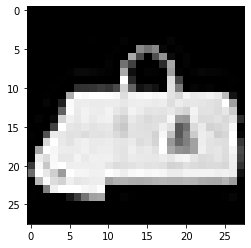

In [49]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[cols].values

# Select just one image from all the images
img = imgs[999]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.imshow(img, cmap='gray')

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [53]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns


# Convert the all columns object into a regular list
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.pop(0)

<class 'list'>


'label'

### 2. Define our `X` and `y`

In [55]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']

### 3. Train-test-split our `X` and `y` data

In [56]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [58]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [59]:
# 2. Fit that model with our training data. 
model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [60]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.848000


### 2. Make new predictions using our test data. 

In [61]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [62]:
### 3. Print the classification report. 
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Ankle boot       0.92      0.96      0.94       148
         Bag       0.96      0.94      0.95       142
        Coat       0.76      0.81      0.78       139
       Dress       0.72      0.90      0.80       135
    Pullover       0.78      0.76      0.77       150
      Sandal       0.93      0.93      0.93       185
       Shirt       0.67      0.58      0.62       135
     Sneaker       0.89      0.87      0.88       162
 T-shirt/top       0.81      0.75      0.78       149
     Trouser       1.00      0.95      0.97       155

    accuracy                           0.85      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.85      0.85      0.85      1500



### 4. Plot the confusion matrix of our predicted results. 

C:\Users\12155\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


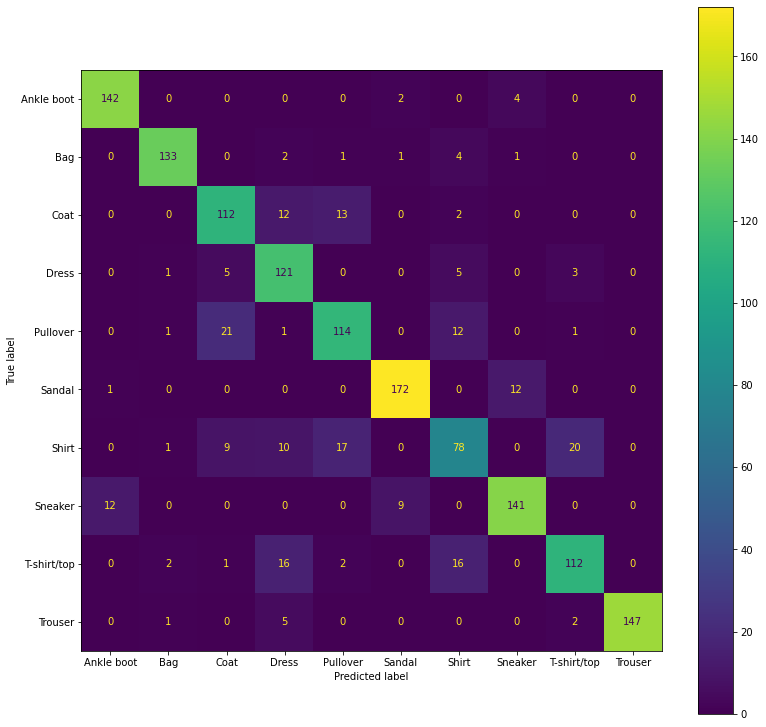

In [63]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [64]:
print('The classifier mistaked T-shirt/top and Shirt.')

The classifier mistaked T-shirt/top and Shirt.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [76]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    # train and fit model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    model.fit(X_train, y_train)
    
    print("Score:", model.score(X_test, y_test))
    
    # metrics
    print(metrics.classification_report(y_test, y_pred))
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)
    
    

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

C:\Users\12155\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12155\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Score: 0.812
              precision    recall  f1-score   support

  Ankle boot       0.09      0.09      0.09       149
         Bag       0.12      0.11      0.11       152
        Coat       0.10      0.11      0.11       136
       Dress       0.15      0.16      0.15       161
    Pullover       0.07      0.07      0.07       147
      Sandal       0.10      0.11      0.11       157
       Shirt       0.09      0.07      0.08       152
     Sneaker       0.09      0.09      0.09       149
 T-shirt/top       0.12      0.12      0.12       147
     Trouser       0.11      0.11      0.11       150

    accuracy                           0.10      1500
   macro avg       0.10      0.10      0.10      1500
weighted avg       0.10      0.10      0.10      1500



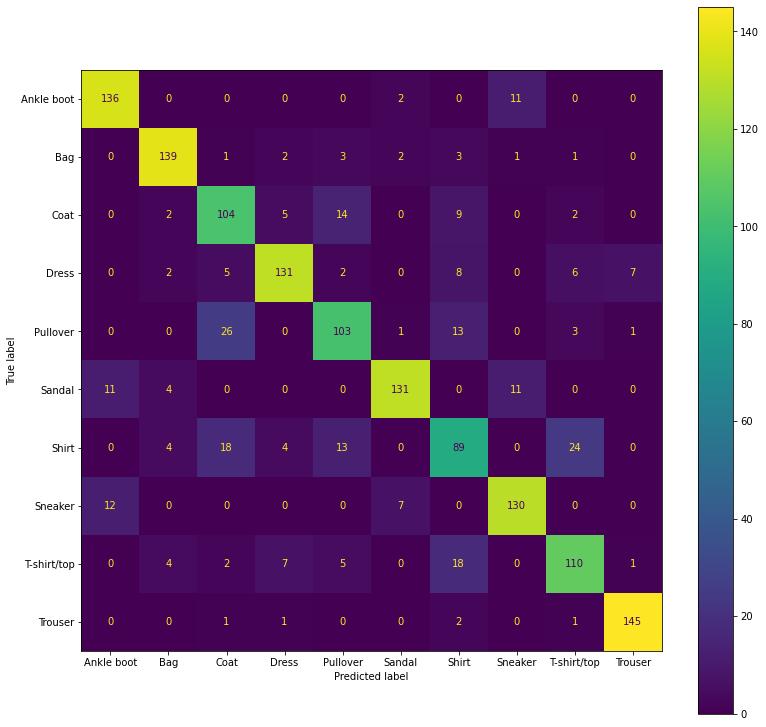

In [77]:
# LogisticRegression
build_and_eval_model(LogisticRegression(), X, y)

Score: 0.8413333333333334
              precision    recall  f1-score   support

  Ankle boot       0.14      0.14      0.14       156
         Bag       0.07      0.07      0.07       152
        Coat       0.09      0.09      0.09       159
       Dress       0.17      0.18      0.17       158
    Pullover       0.08      0.08      0.08       145
      Sandal       0.08      0.09      0.08       155
       Shirt       0.09      0.07      0.08       156
     Sneaker       0.11      0.14      0.12       132
 T-shirt/top       0.11      0.12      0.11       128
     Trouser       0.07      0.06      0.07       159

    accuracy                           0.10      1500
   macro avg       0.10      0.10      0.10      1500
weighted avg       0.10      0.10      0.10      1500



C:\Users\12155\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


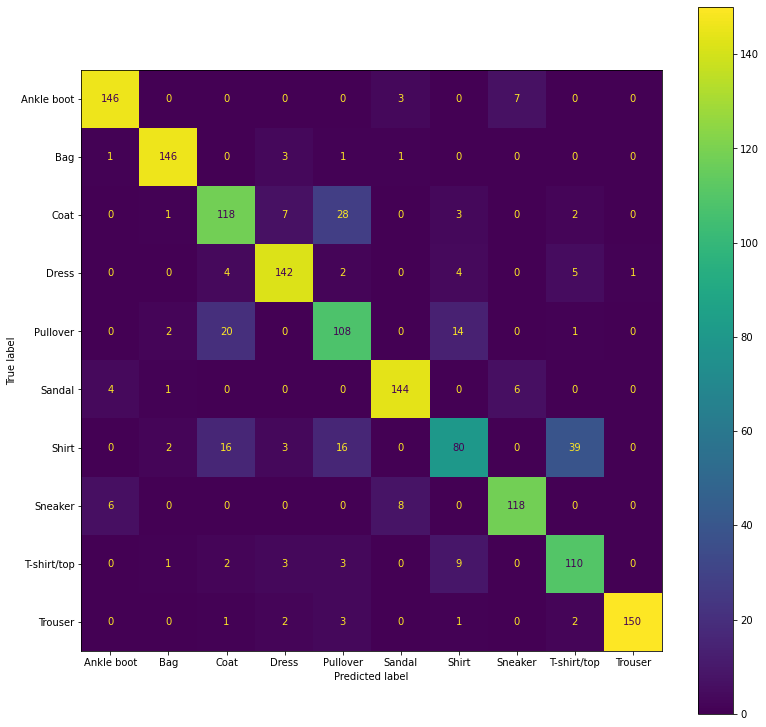

In [78]:
# RandomForest
build_and_eval_model(RandomForestClassifier(), X, y)

Score: 0.658
              precision    recall  f1-score   support

  Ankle boot       0.10      0.09      0.09       171
         Bag       0.12      0.11      0.11       157
        Coat       0.07      0.08      0.07       124
       Dress       0.11      0.14      0.12       133
    Pullover       0.12      0.11      0.11       156
      Sandal       0.12      0.14      0.13       170
       Shirt       0.11      0.09      0.10       137
     Sneaker       0.11      0.12      0.12       147
 T-shirt/top       0.14      0.12      0.13       156
     Trouser       0.12      0.12      0.12       149

    accuracy                           0.11      1500
   macro avg       0.11      0.11      0.11      1500
weighted avg       0.11      0.11      0.11      1500



C:\Users\12155\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


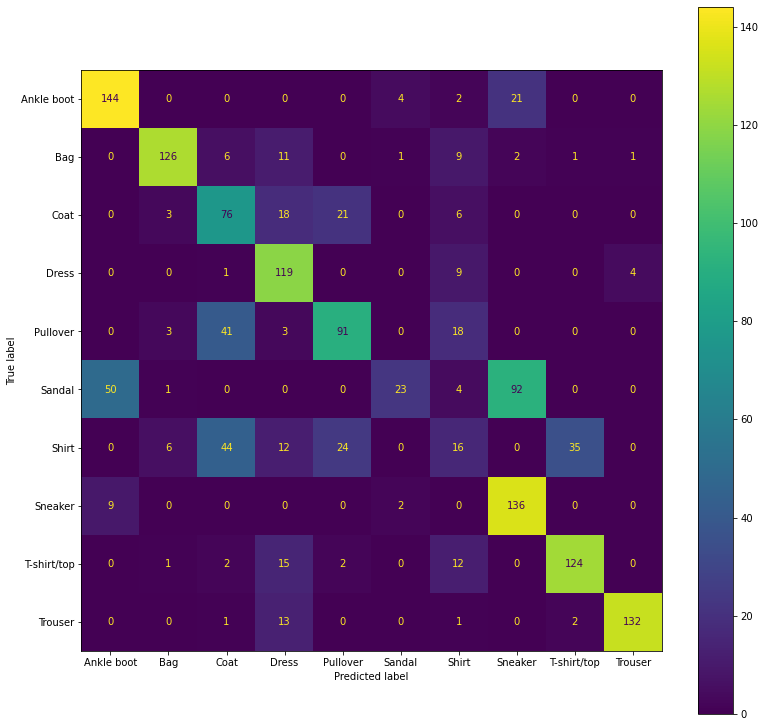

In [79]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
build_and_eval_model(mnb, X, y)

In [3]:
print('Random Forest model did the best and YOUR_ANSWER_HERE model did the worst.')

 YOUR_ANSWER_HERE model did the best and YOUR_ANSWER_HERE model did the worst.


# Dope Extra Credit
### This is going to take some python trickery to get working.  The files are large, in all sorts of strange directories, and in color.  This will not only challenge your data science skills, but also your general 'hacker' skills. 

* Use this data provided Intel to build a classifier for color images in directories: 
* [https://www.kaggle.com/datasets/puneet6060/intel-image-classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
* If you have any issues, just slack me.  I got slack on my phone and love hearing your battle stories 